In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 1. Load Data
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [108]:
# 2. Exploratory Data Analysis (EDA)
print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(y.value_counts(normalize=True))

Dataset Shape: (569, 30)

Target Distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [110]:
# Basic statistics
print("\nBasic Statistics:")
print(X.describe())



Basic Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

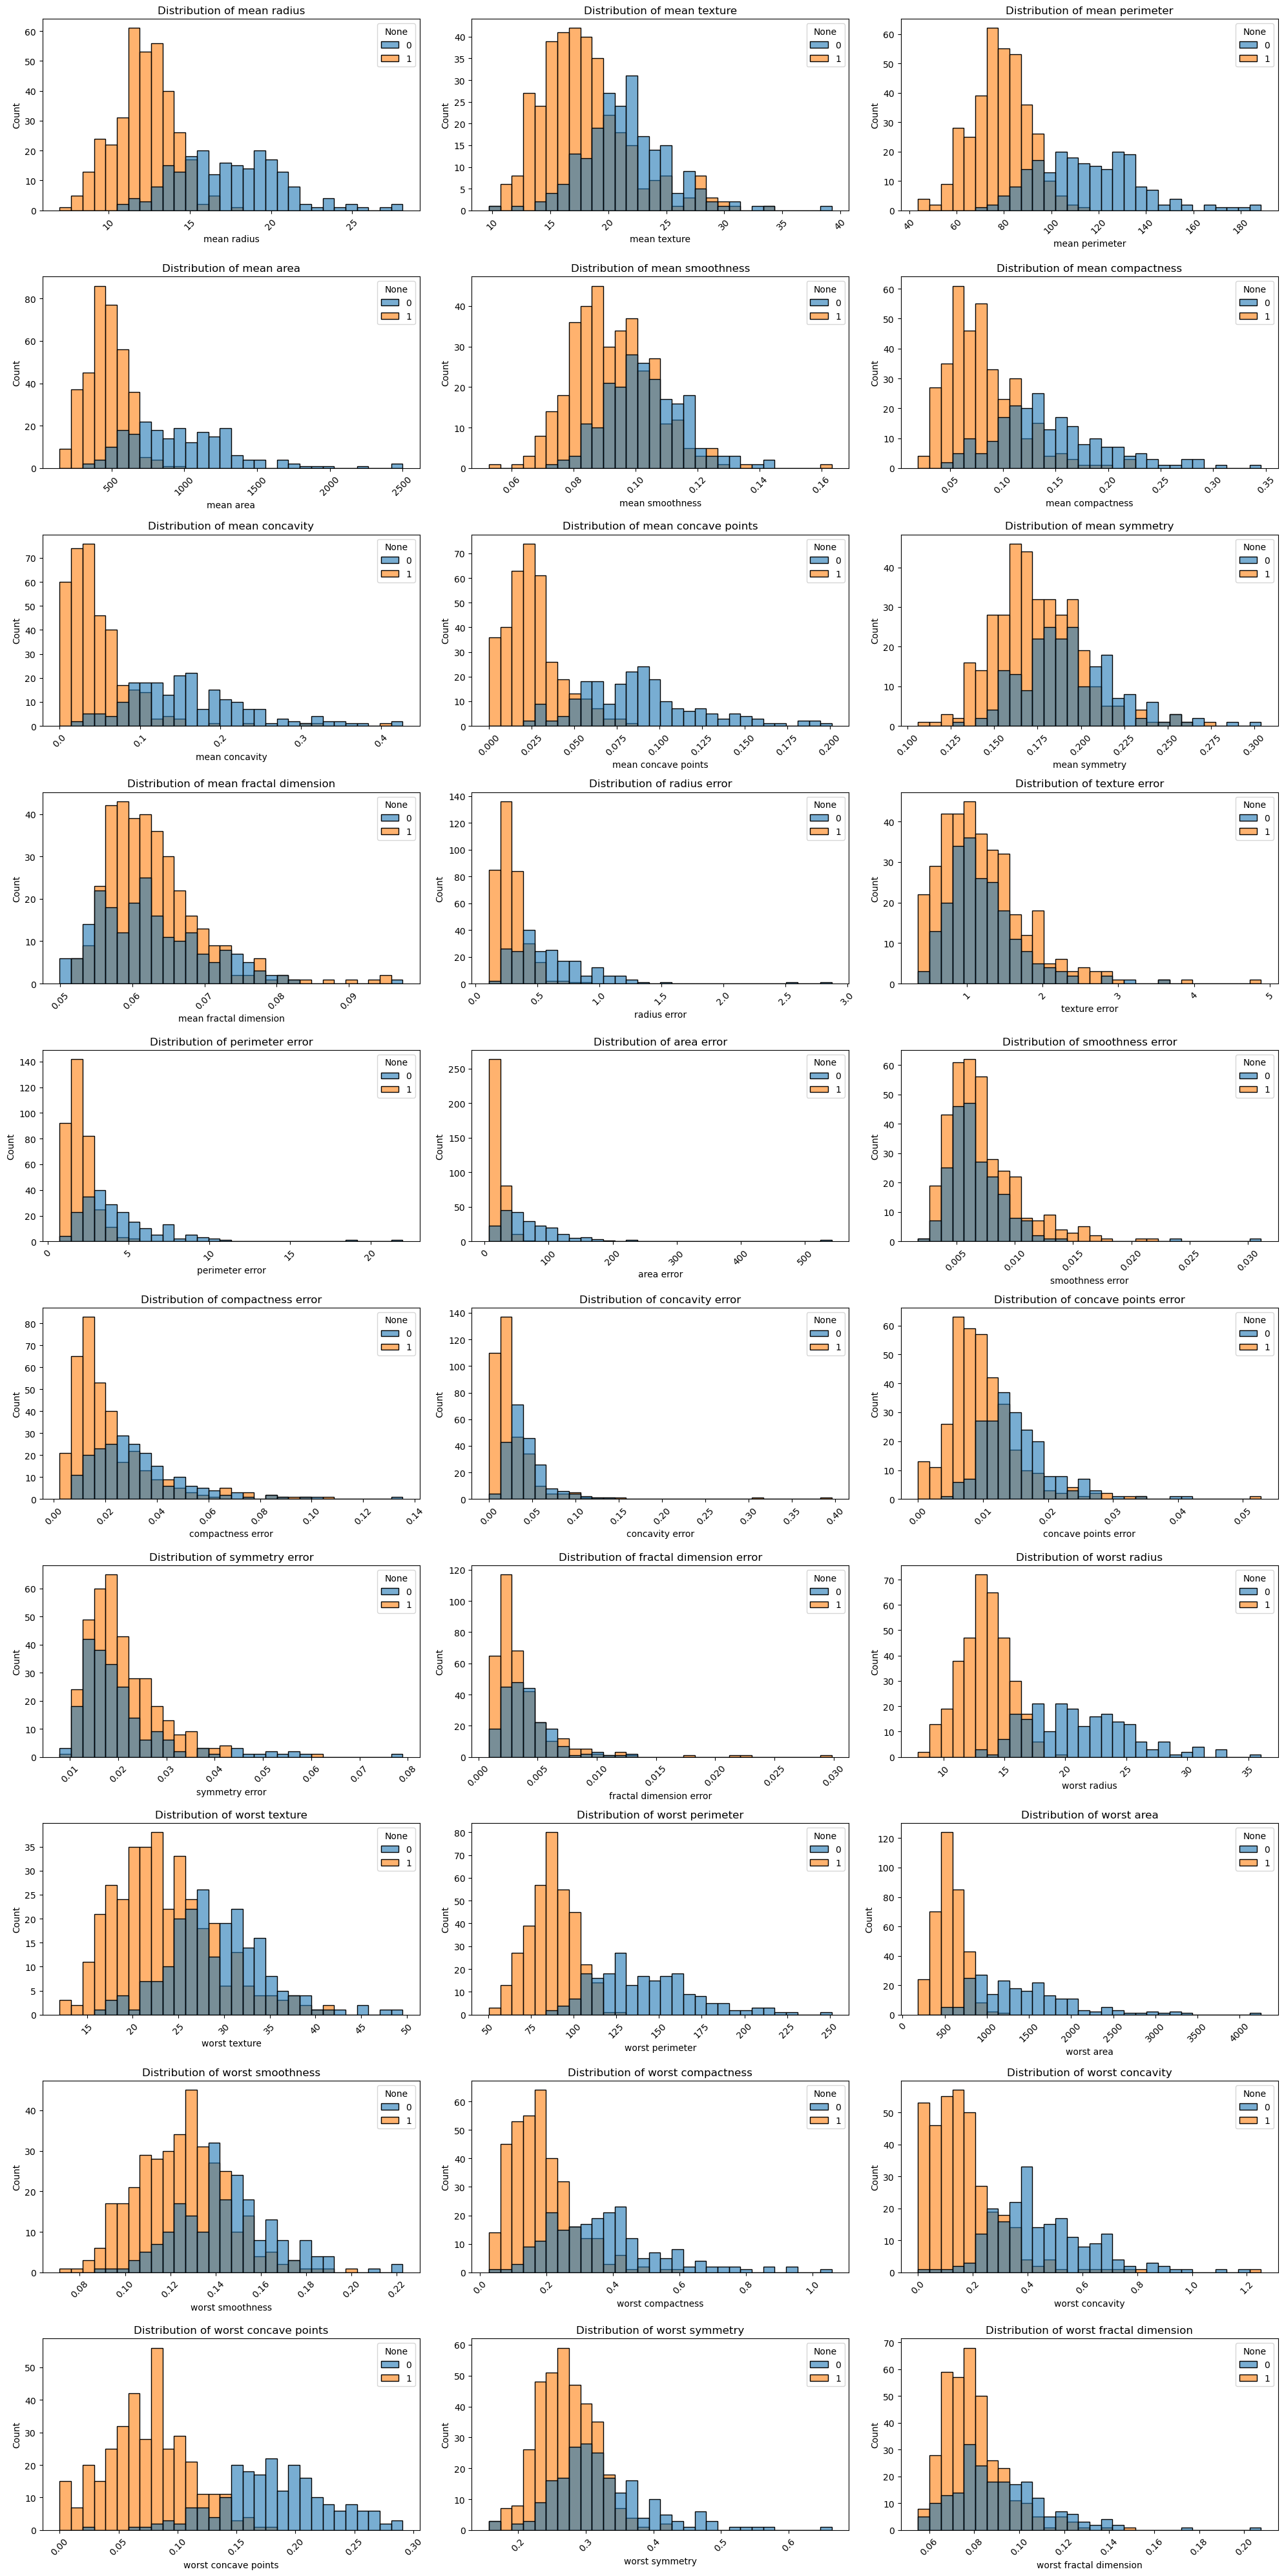

In [112]:
# 2.1 Distribution plots for all features
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=X, x=column, hue=y, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


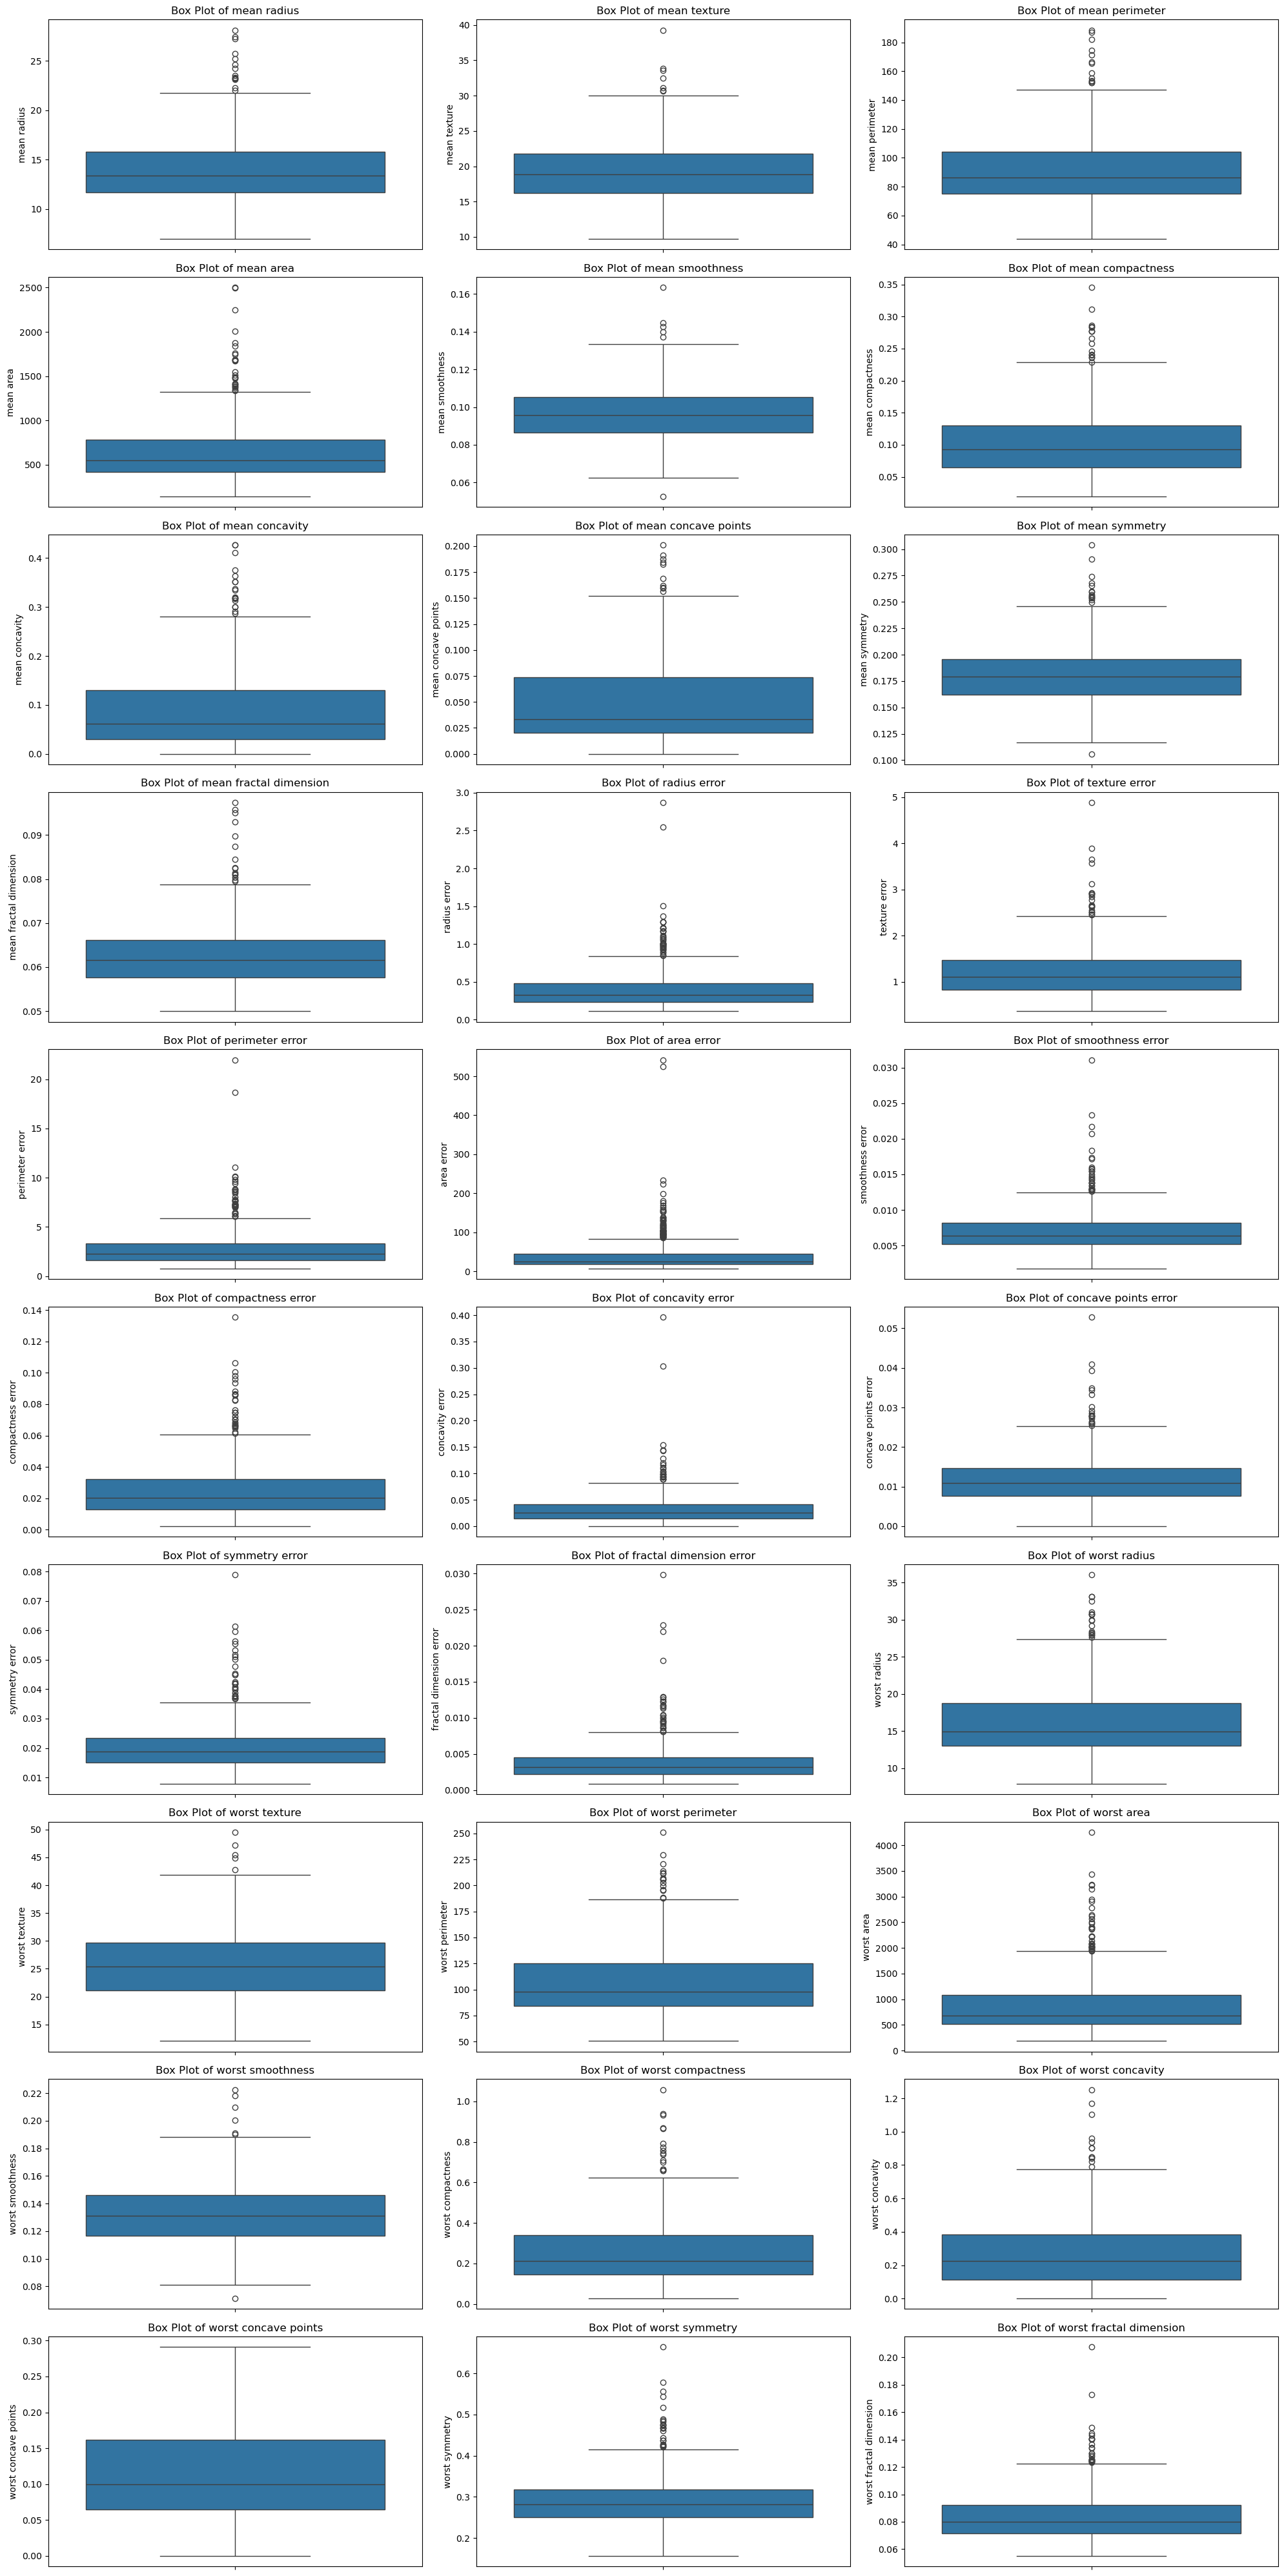

In [114]:
# 2.2 Box plots to visualize outliers
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(data=X, y=column)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

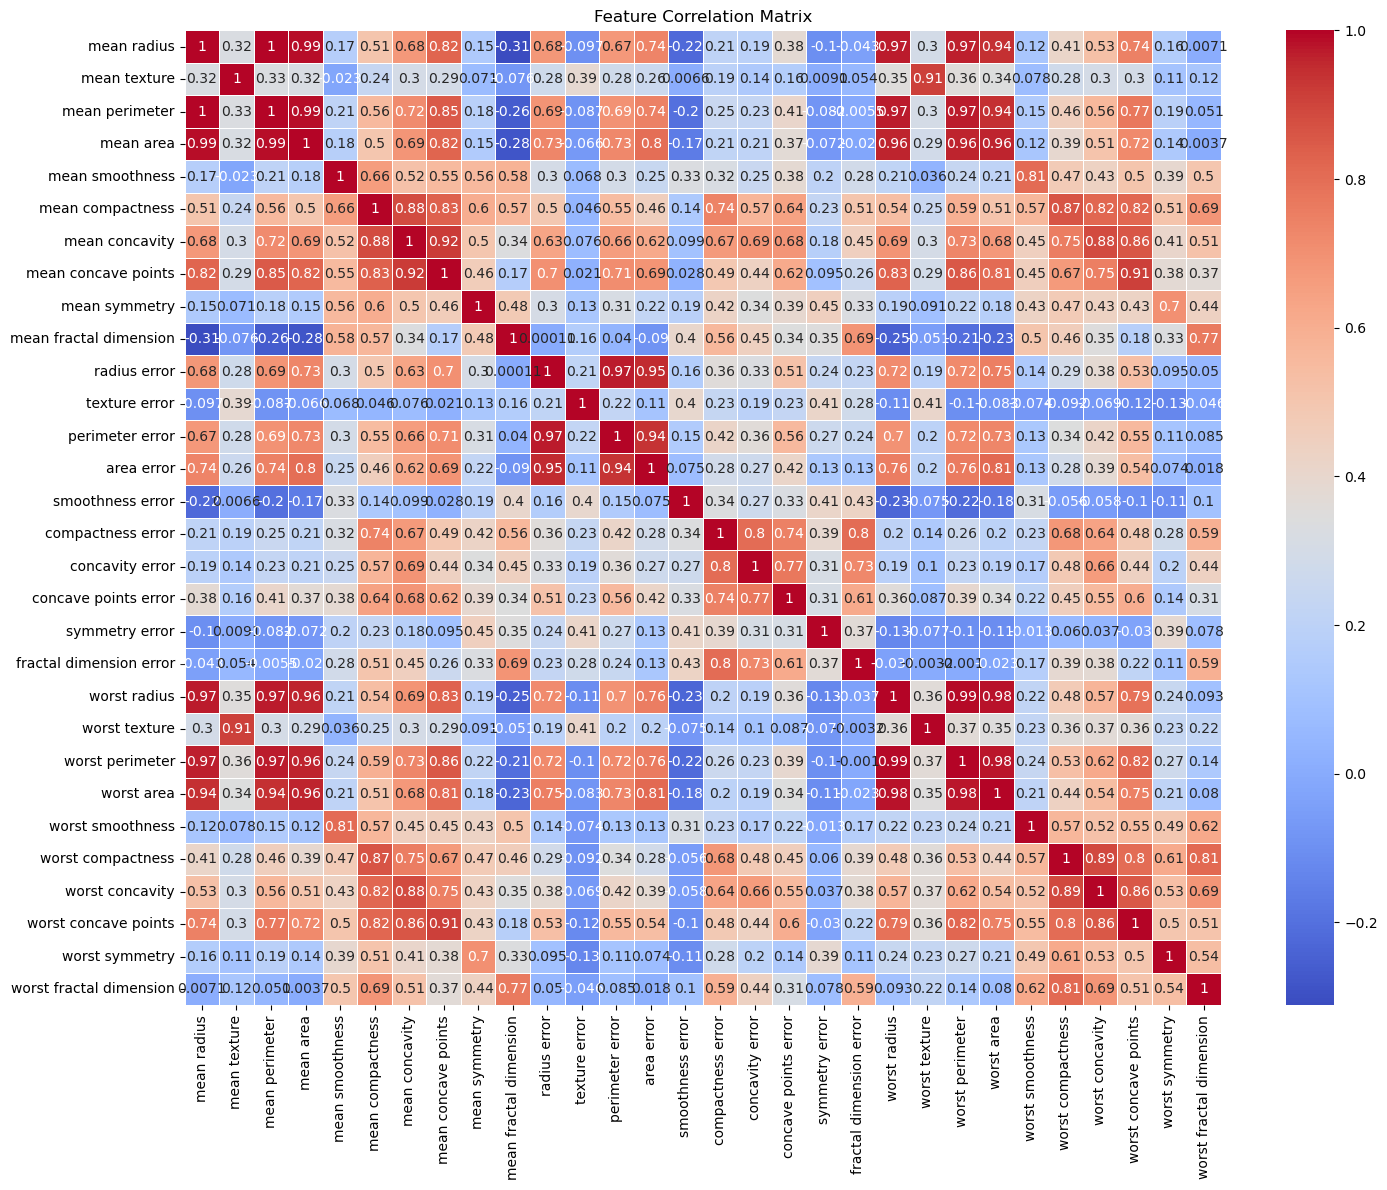

In [116]:
# 2.3 Correlation Matrix
plt.figure(figsize=(15, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

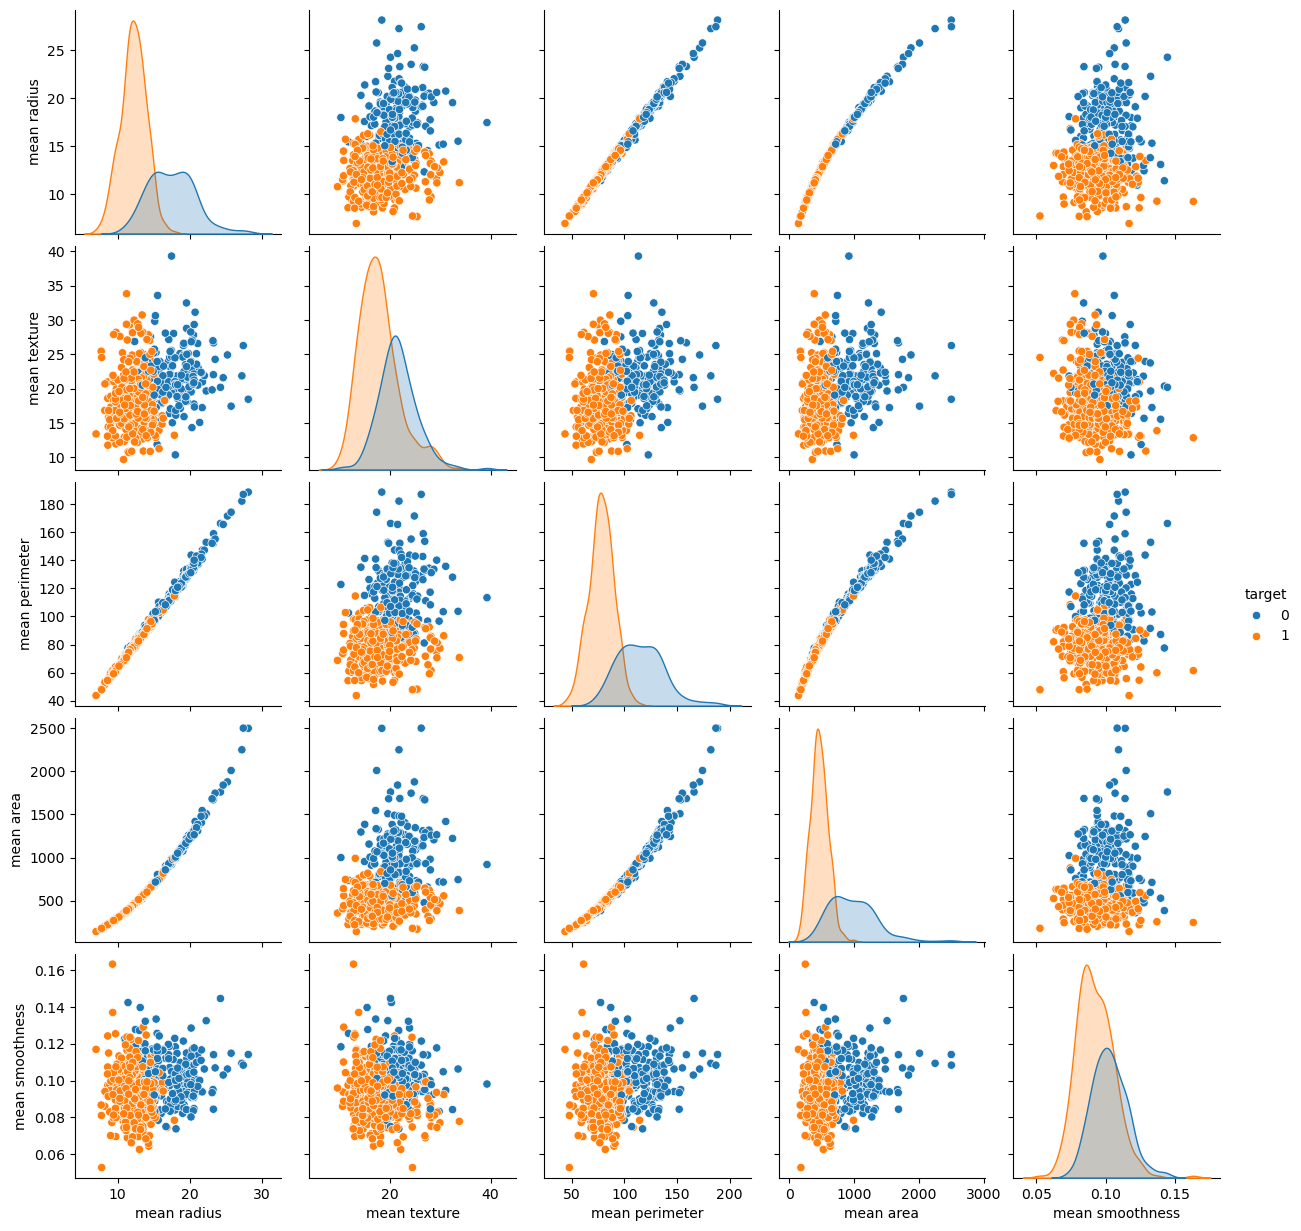

In [118]:
# 2.4 Pair plots for most important features
# Select a subset of features for readability
selected_features = X.columns[:5]  # First 5 features for demonstration
pair_data = X[selected_features].copy()
pair_data['target'] = y
sns.pairplot(pair_data, hue='target')
plt.show()

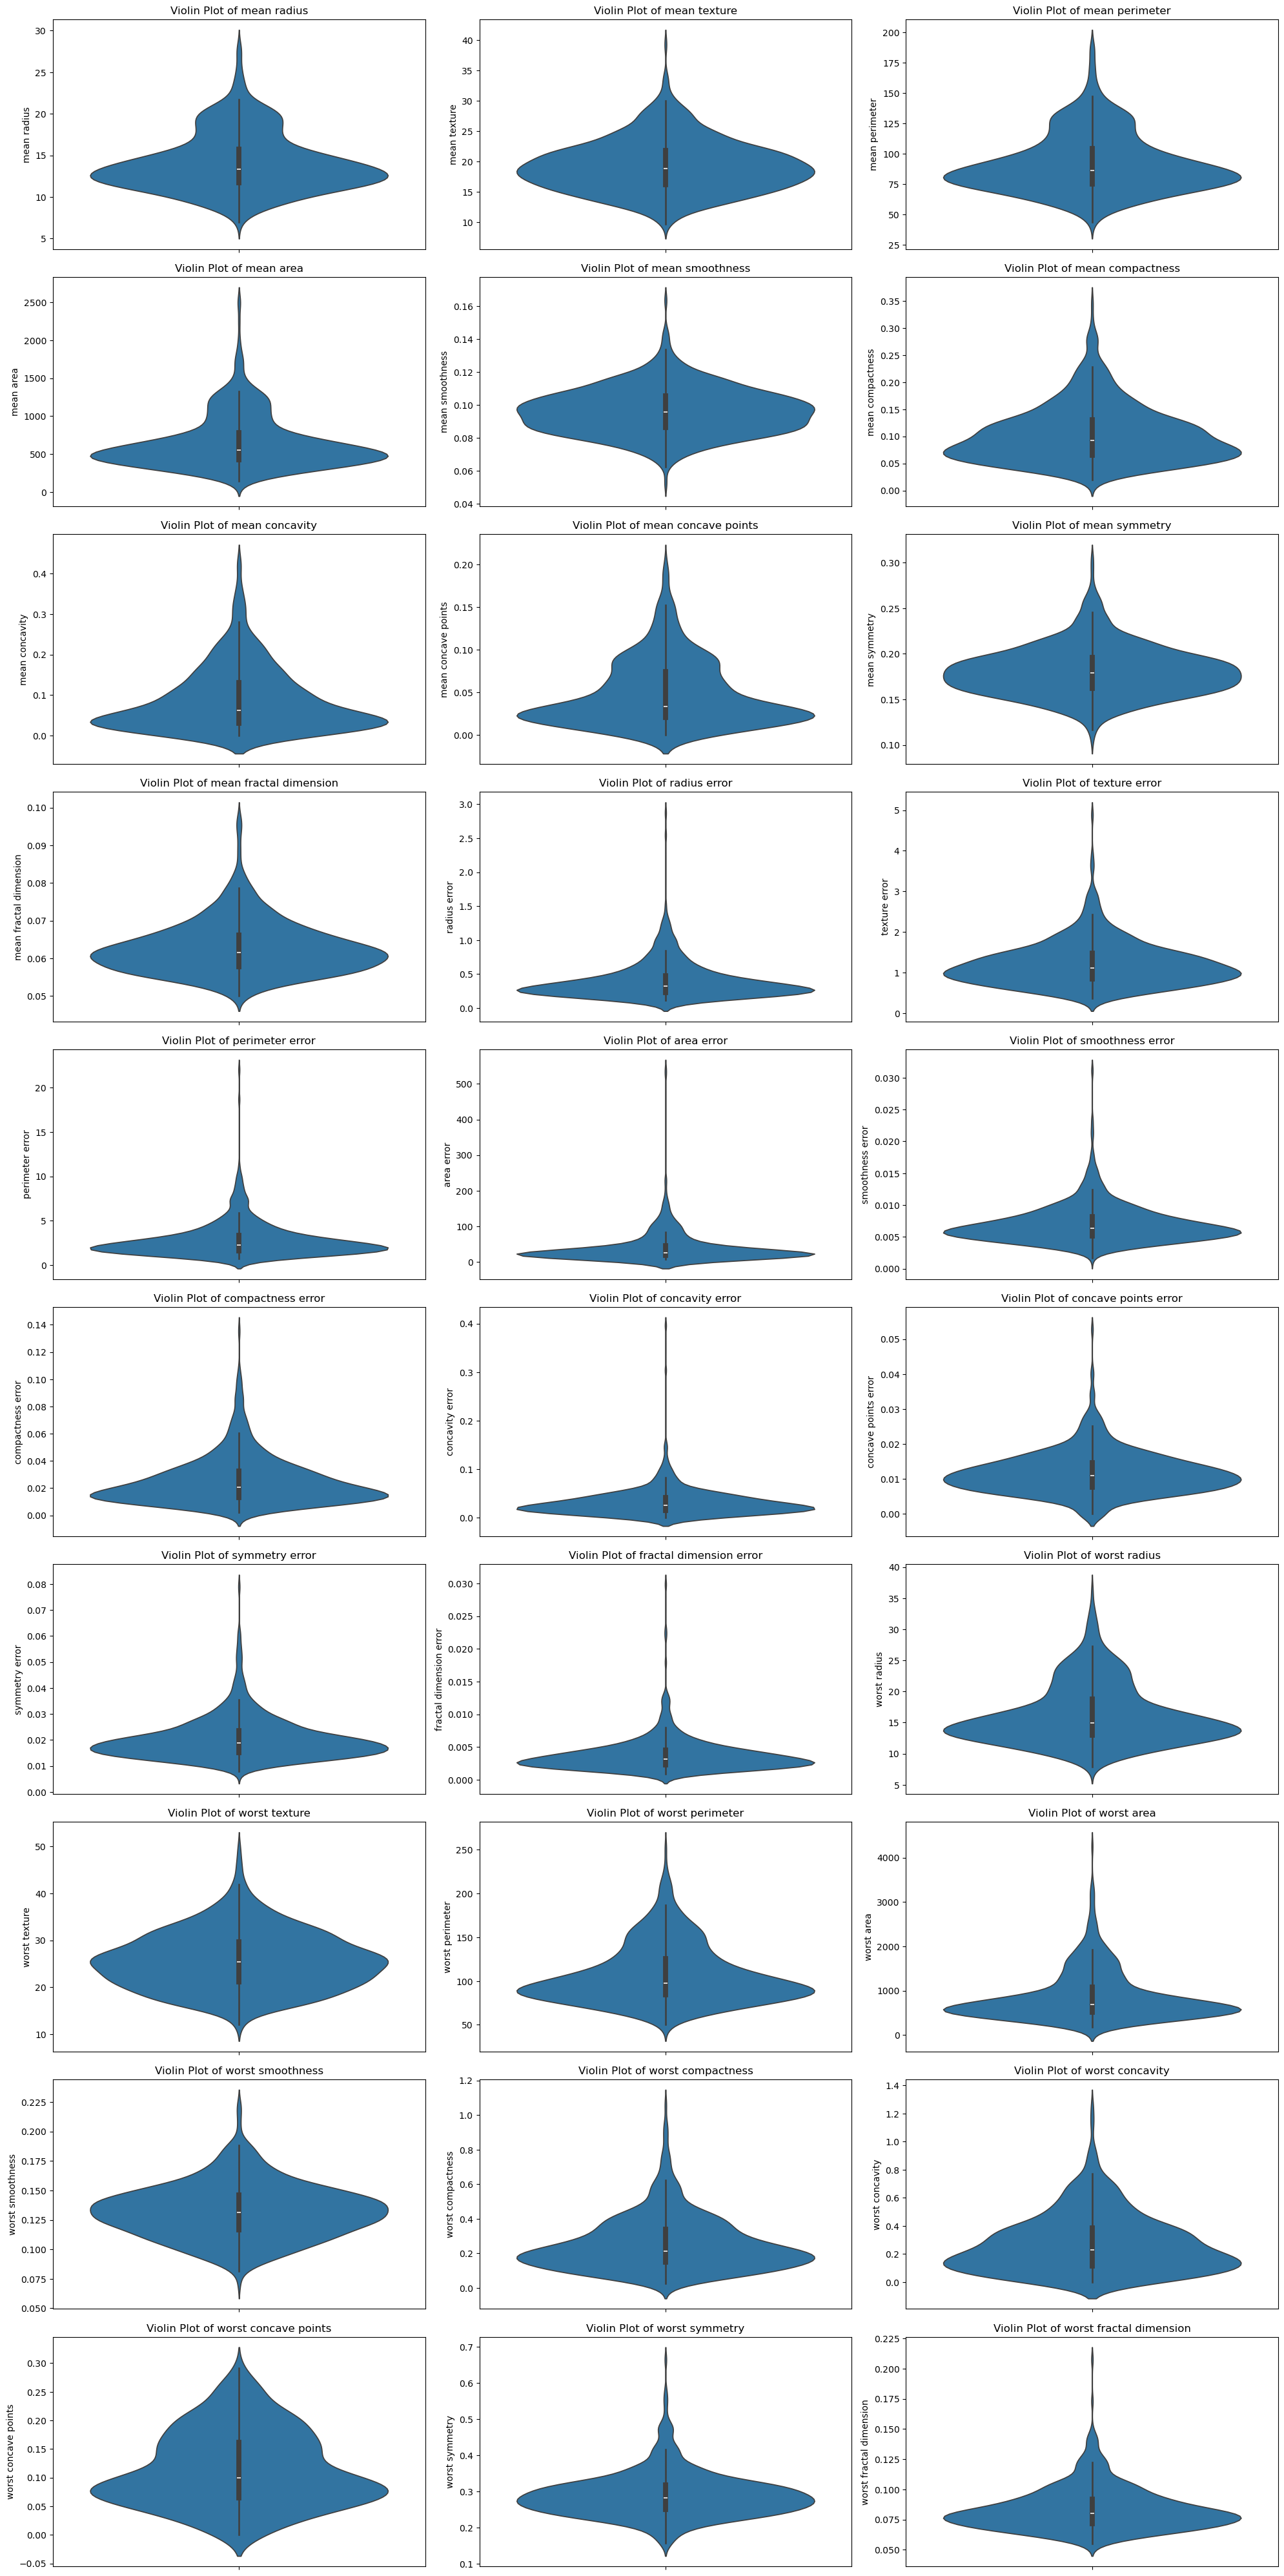

In [120]:
# 2.5 Violin plots for feature distributions by class
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.violinplot(data=pd.DataFrame(X[column]), y=column)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

In [124]:
# 3. Outlier Detection using IQR method
def detect_outliers(df):
    outliers_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    return pd.Series(outliers_dict)
outliers_count = detect_outliers(X)
print("\nNumber of outliers in each feature:")
print(outliers_count)



Number of outliers in each feature:
mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


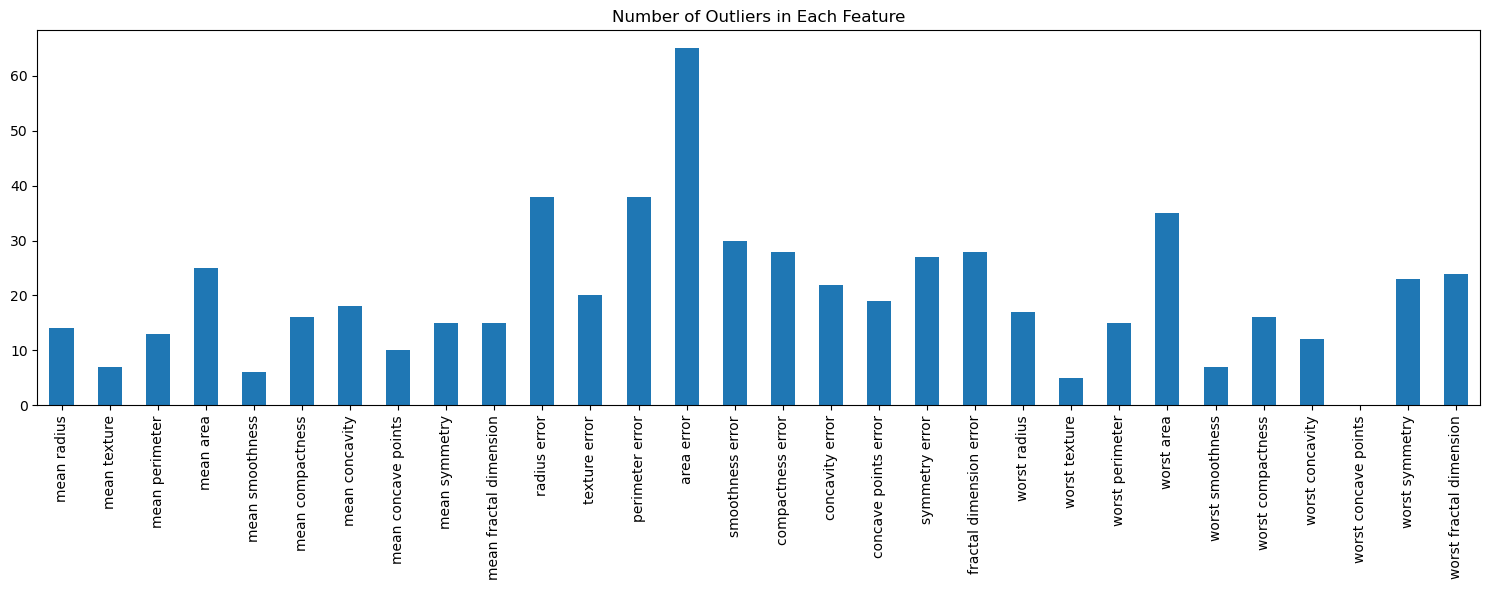

In [126]:
# Visualize outliers count
plt.figure(figsize=(15, 6))
outliers_count.plot(kind='bar')
plt.title('Number of Outliers in Each Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [128]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [130]:
# 5. Feature Selection using SelectKBest
# Initialize SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)


In [132]:
# Fit and transform the training data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [134]:
# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = X_train.columns[selected_features_mask].tolist()

In [136]:
# Create feature scores DataFrame
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

In [138]:
print("\nTop 15 Selected Features:")
print(feature_scores.head(15))


Top 15 Selected Features:
                 Feature       Score
27  worst concave points  795.223341
22       worst perimeter  719.598823
7    mean concave points  703.364031
20          worst radius  687.430367
2         mean perimeter  565.485755
23            worst area  541.713694
0            mean radius  523.613907
3              mean area  469.516453
6         mean concavity  416.374874
26       worst concavity  365.747389
5       mean compactness  269.466042
25     worst compactness  257.926057
13            area error  214.858763
10          radius error  212.499767
12       perimeter error  198.422440


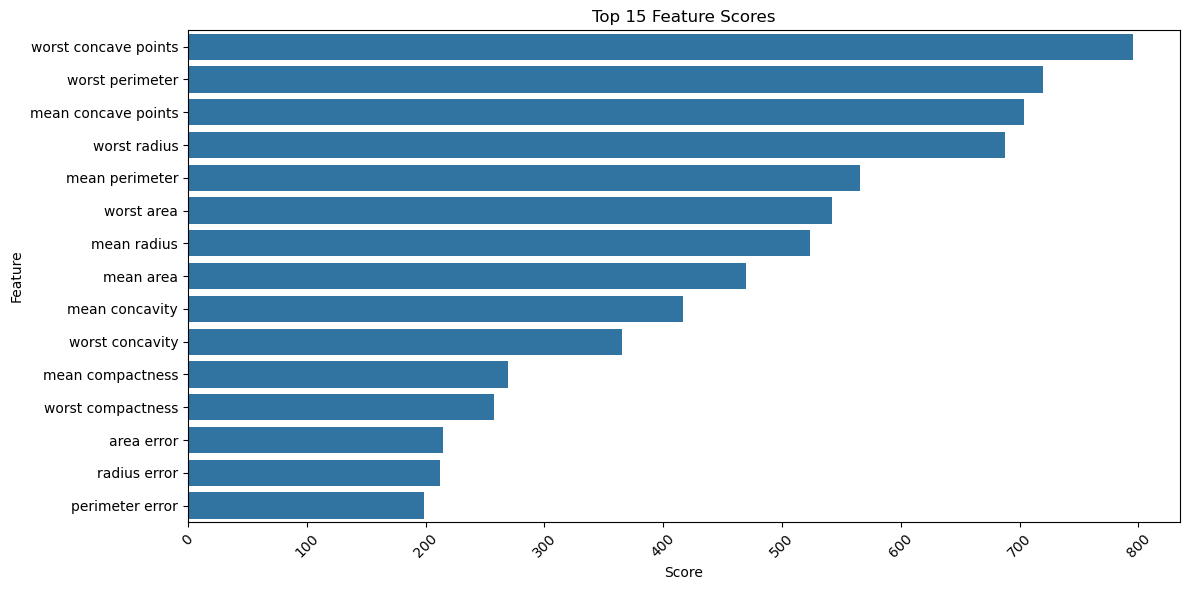

In [140]:
# Visualize feature scores
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_scores.head(15), x='Score', y='Feature')
plt.title('Top 15 Feature Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:
# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [148]:
# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

In [150]:

# Verify scaling results
print("\nScaled Data Statistics:")
print(X_train_scaled.describe())


Scaled Data Statistics:
        mean radius  mean perimeter     mean area  mean compactness  \
count  4.550000e+02    4.550000e+02  4.550000e+02      4.550000e+02   
mean  -2.928061e-16   -1.629954e-16 -1.717796e-16     -2.088683e-16   
std    1.001101e+00    1.001101e+00  1.001101e+00      1.001101e+00   
min   -2.027220e+00   -1.980187e+00 -1.465734e+00     -1.580330e+00   
25%   -6.958063e-01   -6.979907e-01 -6.758983e-01     -7.504076e-01   
50%   -2.280663e-01   -2.312101e-01 -3.097848e-01     -2.412686e-01   
75%    4.785500e-01    5.033684e-01  3.526440e-01      4.906419e-01   
max    4.017353e+00    4.018733e+00  5.370416e+00      4.517740e+00   

       mean concavity  mean concave points  radius error  perimeter error  \
count    4.550000e+02         4.550000e+02  4.550000e+02     4.550000e+02   
mean    -1.561632e-17         6.636938e-17 -2.342449e-17     1.737316e-16   
std      1.001101e+00         1.001101e+00  1.001101e+00     1.001101e+00   
min     -1.092292e+00      

In [152]:
# 7. Save preprocessed data for modeling
print("\nFinal preprocessed data shapes:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Final preprocessed data shapes:
X_train_scaled shape: (455, 15)
X_test_scaled shape: (114, 15)
y_train shape: (455,)
y_test shape: (114,)


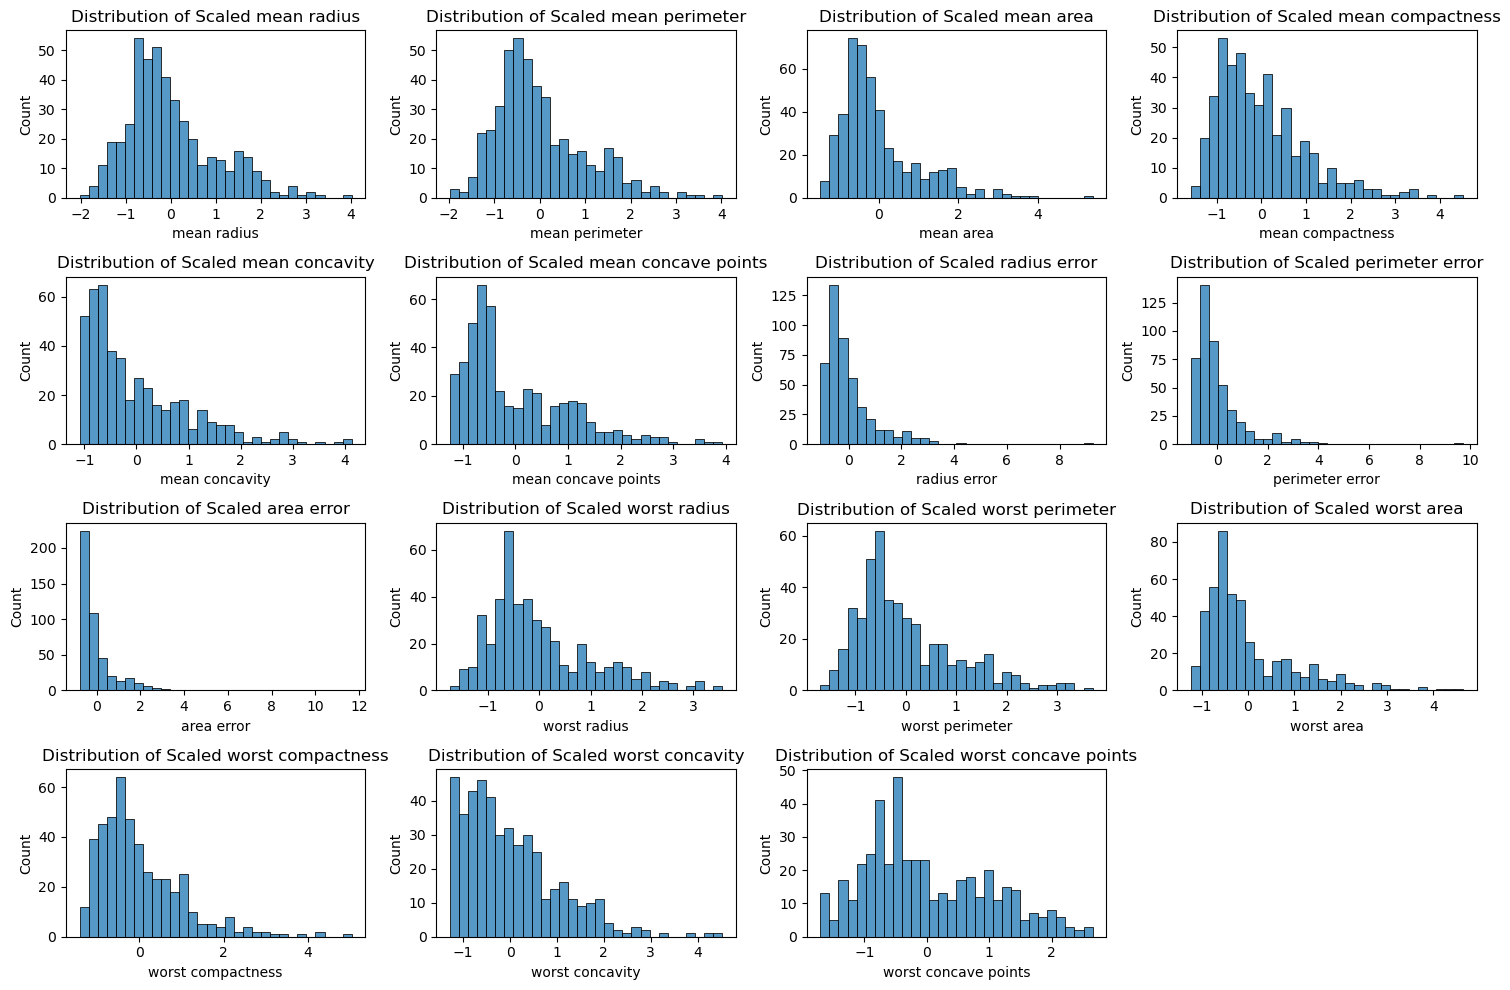

In [154]:
# 8. Additional visualizations for preprocessed data

# 8.1 Distribution of scaled features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train_scaled.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=X_train_scaled, x=column, bins=30)
    plt.title(f'Distribution of Scaled {column}')
plt.tight_layout()
plt.show()

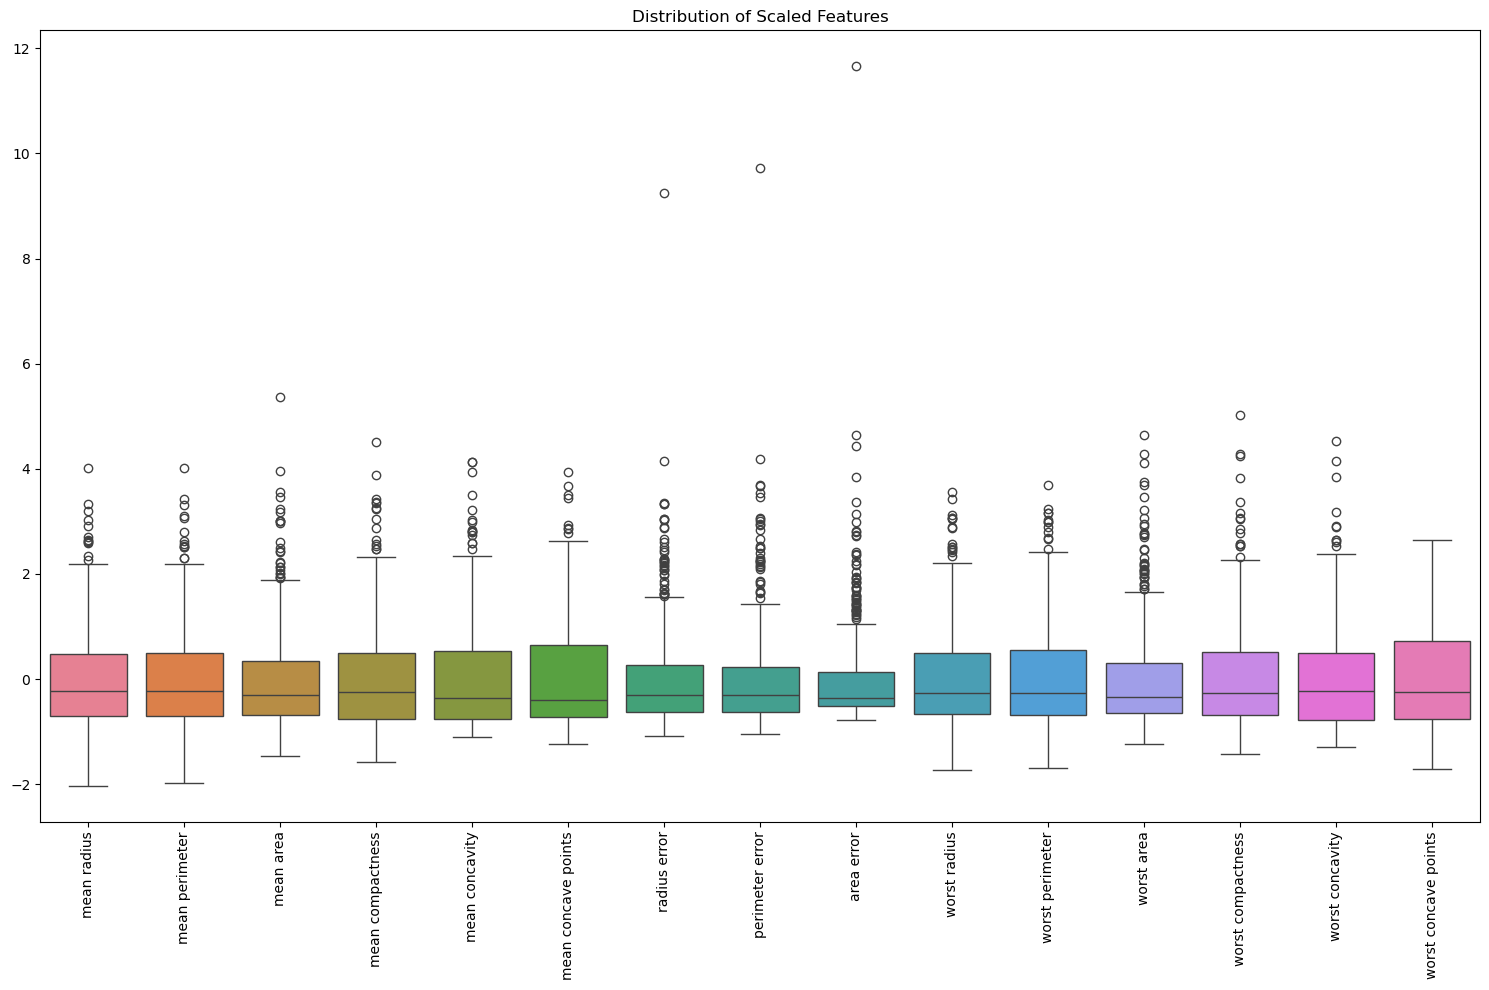

In [156]:
# 8.2 Box plots of scaled features
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_scaled)
plt.title('Distribution of Scaled Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

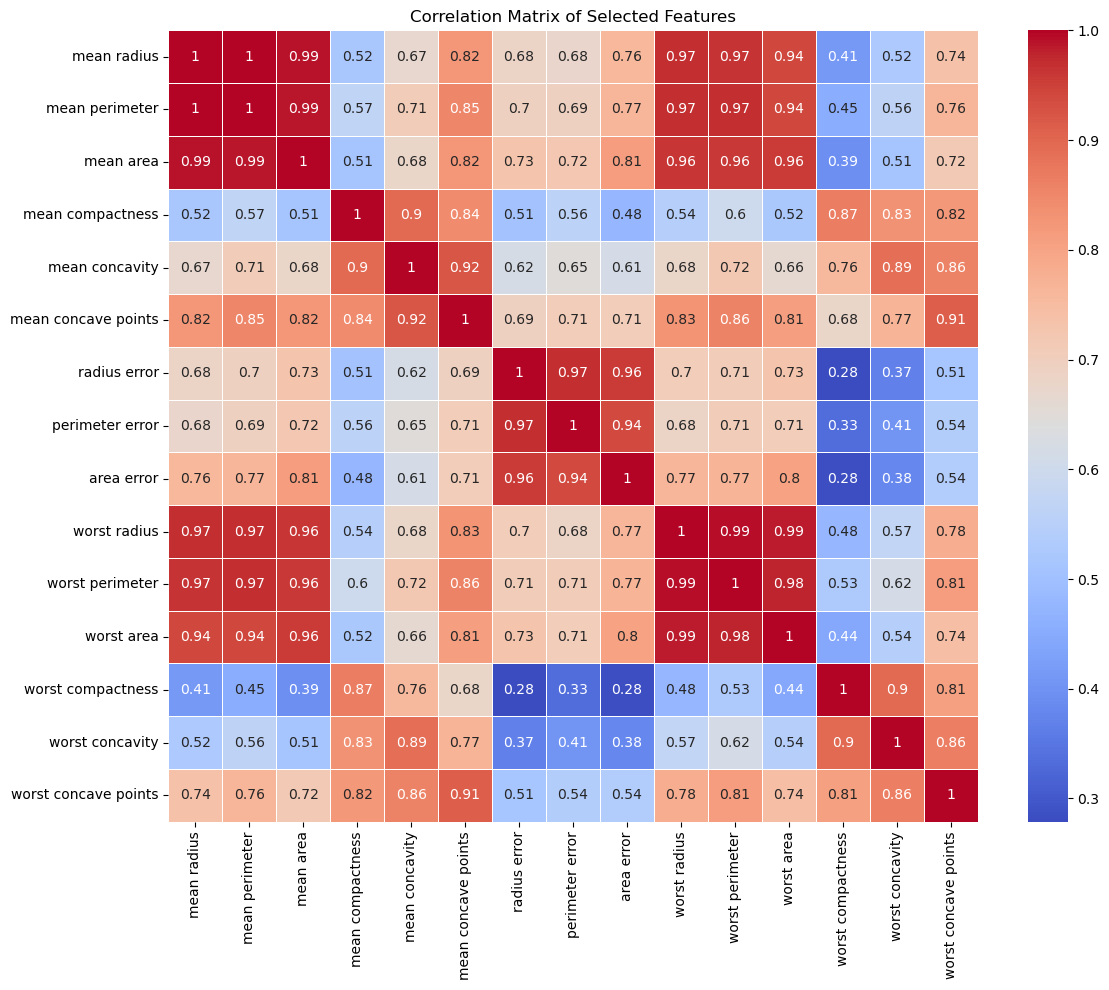

In [158]:
# 8.3 Correlation matrix of selected features
plt.figure(figsize=(12, 10))
correlation_matrix_selected = X_train_scaled.corr()
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

9. Model Building and Evaluation - Separate for each algorithm

In [161]:
# 9.1 Logistic Regression
print("\n=== Logistic Regression ===")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


=== Logistic Regression ===


LogisticRegression(max_iter=1000, random_state=42)

In [163]:
# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [165]:
# Metrics
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print("ROC AUC Score:", roc_auc_score(y_test, lr_pred_proba))


Logistic Regression Metrics:
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222
ROC AUC Score: 0.9914021164021164


In [171]:
# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores (mean ± std):", 
      f"{lr_cv_scores.mean():.3f} ± {lr_cv_scores.std():.3f}")


Cross-validation scores (mean ± std): 0.941 ± 0.015


In [173]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



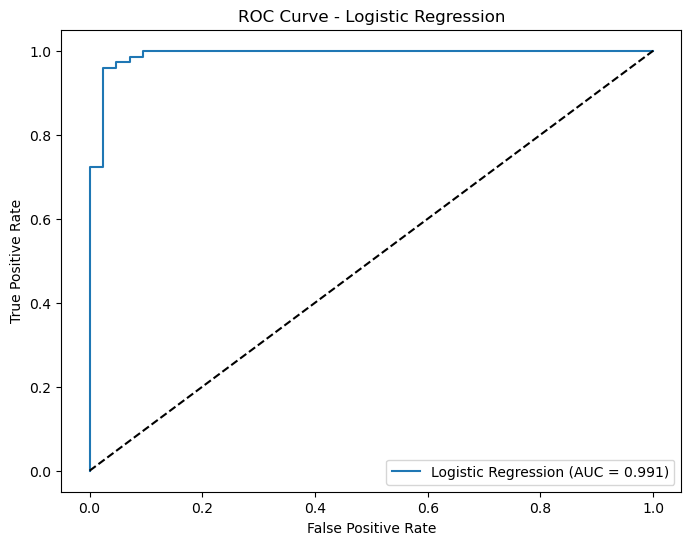

In [175]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

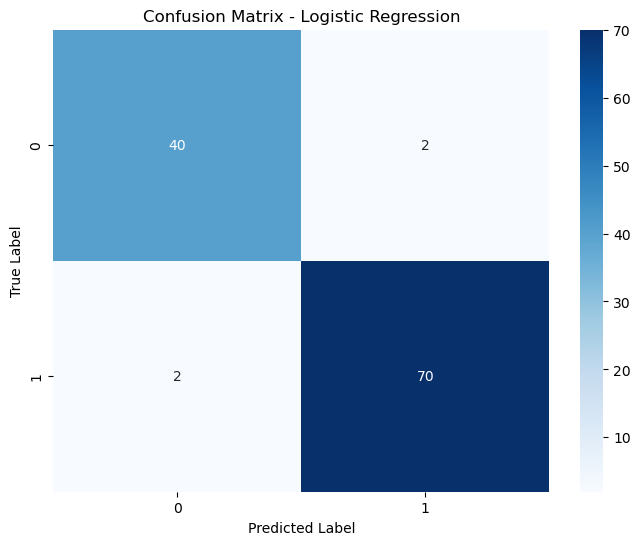

In [177]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [179]:
# 9.2 Random Forest
print("\n=== Random Forest ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


=== Random Forest ===


RandomForestClassifier(random_state=42)

In [181]:
# Predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [183]:
# Metrics
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred_proba))


Random Forest Metrics:
Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1 Score: 0.9655172413793104
ROC AUC Score: 0.9912367724867726


In [185]:
# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores (mean ± std):", 
      f"{rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")


Cross-validation scores (mean ± std): 0.947 ± 0.018


In [187]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



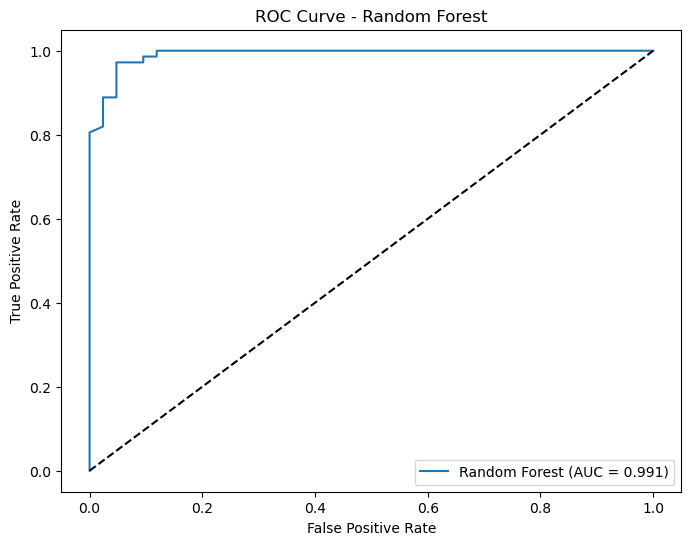

In [189]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

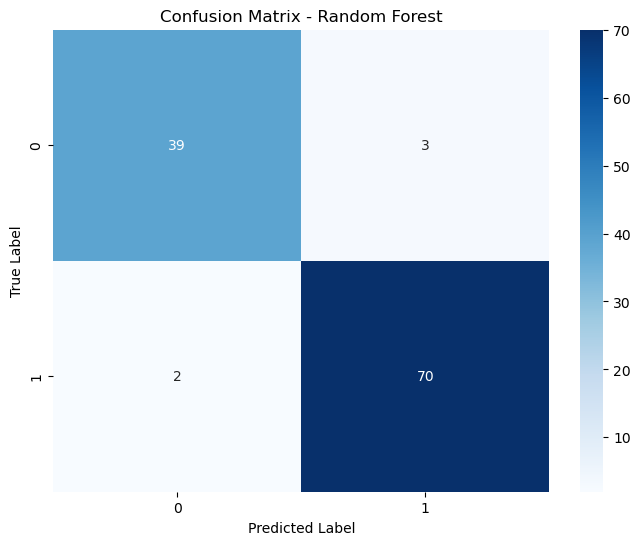

In [191]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [193]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

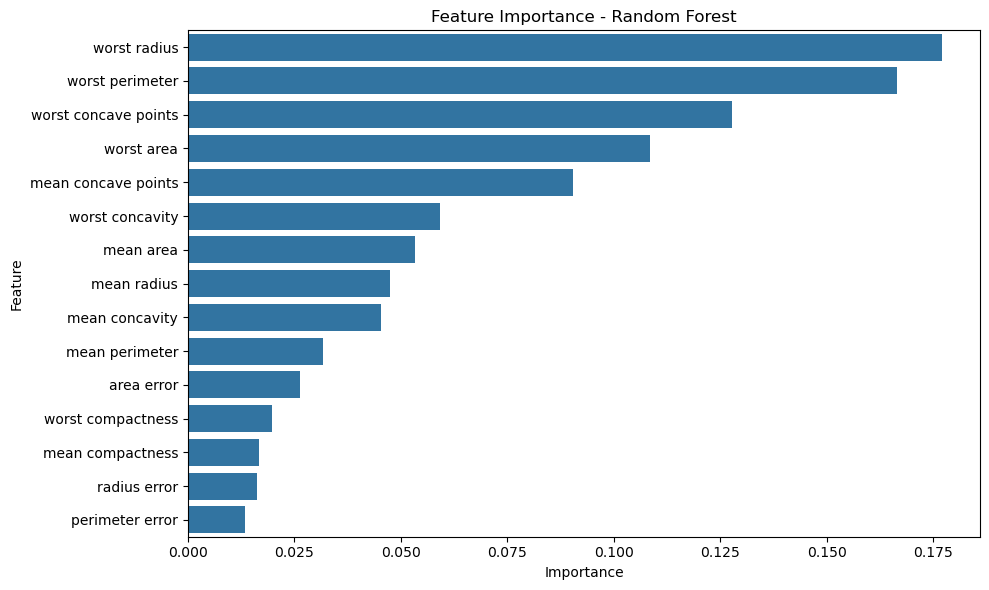

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [28]:
# 9.3 Support Vector Machine
print("\n=== Support Vector Machine ===")
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)


=== Support Vector Machine ===


SVC(probability=True, random_state=42)

In [29]:
# Predictions
svm_pred = svm_model.predict(X_test_scaled)
svm_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# Metrics
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("ROC AUC Score:", roc_auc_score(y_test, svm_pred_proba))


SVM Metrics:
Accuracy: 0.9473684210526315
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1 Score: 0.9583333333333334
ROC AUC Score: 0.9910714285714286


In [31]:
# Cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores (mean ± std):", 
      f"{svm_cv_scores.mean():.3f} ± {svm_cv_scores.std():.3f}")


Cross-validation scores (mean ± std): 0.947 ± 0.015


In [32]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



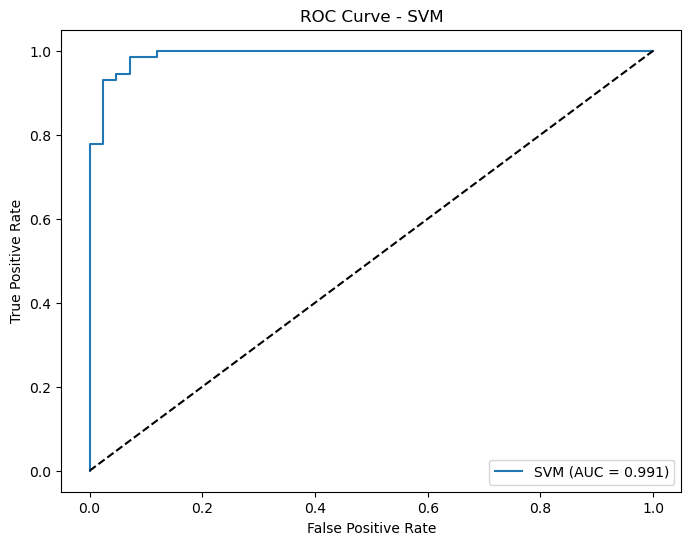

In [33]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred_proba)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, svm_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

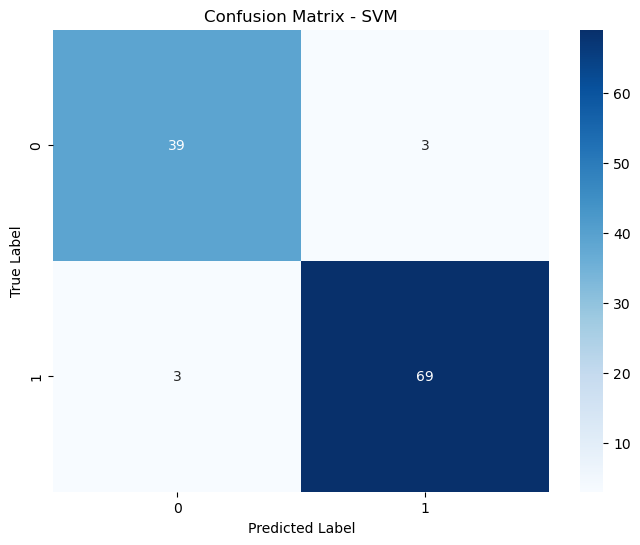

In [34]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
# 5.4 K-Nearest Neighbors
print("\n=== K-Nearest Neighbors ===")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


=== K-Nearest Neighbors ===


KNeighborsClassifier()

In [36]:
# Predictions
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

In [37]:
# Metrics
print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print("ROC AUC Score:", roc_auc_score(y_test, knn_pred_proba))


KNN Metrics:
Accuracy: 0.956140350877193
Precision: 0.971830985915493
Recall: 0.9583333333333334
F1 Score: 0.965034965034965
ROC AUC Score: 0.9803240740740741


In [38]:
# Cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores (mean ± std):", 
      f"{knn_cv_scores.mean():.3f} ± {knn_cv_scores.std():.3f}")


Cross-validation scores (mean ± std): 0.936 ± 0.018


In [39]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



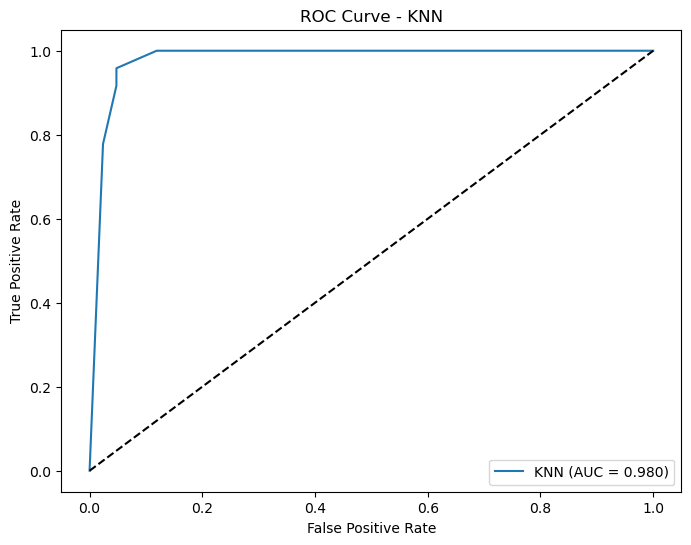

In [40]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pred_proba)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, knn_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

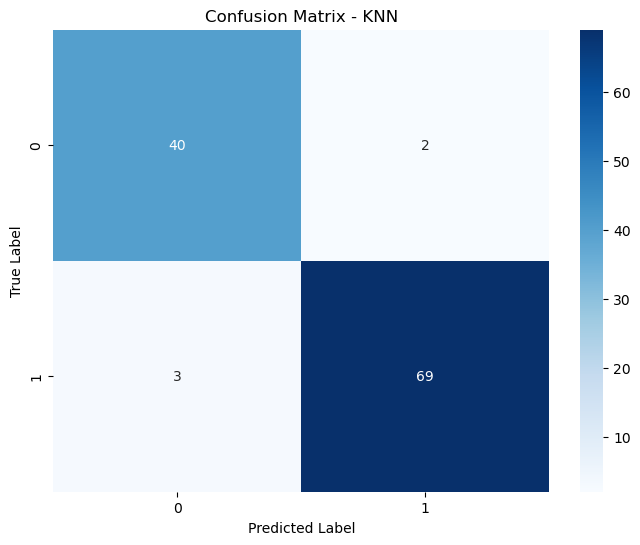

In [41]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
# 6. Model Comparison
models_comparison = pd.DataFrame({
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr_pred),
        'Precision': precision_score(y_test, lr_pred),
        'Recall': recall_score(y_test, lr_pred),
        'F1 Score': f1_score(y_test, lr_pred),
        'ROC AUC': roc_auc_score(y_test, lr_pred_proba),
        'CV Score': lr_cv_scores.mean()
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rf_pred),
        'Precision': precision_score(y_test, rf_pred),
        'Recall': recall_score(y_test, rf_pred),
        'F1 Score': f1_score(y_test, rf_pred),
        'ROC AUC': roc_auc_score(y_test, rf_pred_proba),
        'CV Score': rf_cv_scores.mean()
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, svm_pred),
        'Precision': precision_score(y_test, svm_pred),
        'Recall': recall_score(y_test, svm_pred),
        'F1 Score': f1_score(y_test, svm_pred),
        'ROC AUC': roc_auc_score(y_test, svm_pred_proba),
        'CV Score': svm_cv_scores.mean()
    },
    'KNN': {
        'Accuracy': accuracy_score(y_test, knn_pred),
        'Precision': precision_score(y_test, knn_pred),
        'Recall': recall_score(y_test, knn_pred),
        'F1 Score': f1_score(y_test, knn_pred),
        'ROC AUC': roc_auc_score(y_test, knn_pred_proba),
        'CV Score': knn_cv_scores.mean()
    }
})

In [43]:
# Print comparison
print("\nModel Comparison:")
print(models_comparison.round(3))


Model Comparison:
           Logistic Regression  Random Forest    SVM    KNN
Accuracy                 0.965          0.956  0.947  0.956
Precision                0.972          0.959  0.958  0.972
Recall                   0.972          0.972  0.958  0.958
F1 Score                 0.972          0.966  0.958  0.965
ROC AUC                  0.991          0.991  0.991  0.980
CV Score                 0.941          0.947  0.947  0.936


<Figure size 1200x600 with 0 Axes>

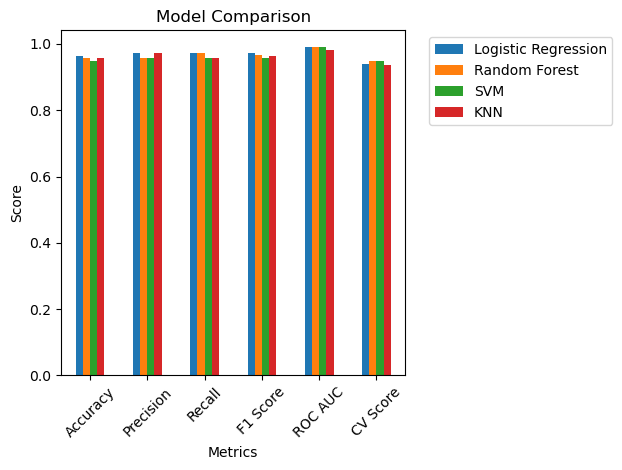

In [44]:
# Plot comparison
plt.figure(figsize=(12, 6))
models_comparison.plot(kind='bar')
plt.title('Model Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
# Find best model for each metric
best_models = models_comparison.idxmax(axis=1)
print("\nBest Model for Each Metric:")
for metric, model in best_models.items():
    print(f"{metric}: {model} ({models_comparison.loc[metric, model]:.3f})")


Best Model for Each Metric:
Accuracy: Logistic Regression (0.965)
Precision: Logistic Regression (0.972)
Recall: Logistic Regression (0.972)
F1 Score: Logistic Regression (0.972)
ROC AUC: Logistic Regression (0.991)
CV Score: Random Forest (0.947)
